In [1]:
import polars as pl

url = "https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv"
data = pl.read_csv(url)
data = data.with_columns(pl.col("Survived").cast(pl.Boolean))
# Embarked に null が入っているので文字列で埋める
data = data.fill_null("NA")
# strをカテゴリカルに変更
data = data.with_columns(pl.col("Embarked").cast(pl.Categorical))
# enum = pl.Enum(["C","Q","S","NA"])
# data = data.with_columns(pl.col("Embarked").cast(enum))


data

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,bool,i64,str,str,f64,i64,i64,str,f64,str,cat
1,false,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,"""NA""","""S"""
2,true,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,true,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,"""NA""","""S"""
4,true,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,false,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,"""NA""","""S"""
…,…,…,…,…,…,…,…,…,…,…,…
152,true,1,"""Pears, Mrs. Thomas (Edith Wear…","""female""",22.0,1,0,"""113776""",66.6,"""C2""","""S"""
153,false,3,"""Meo, Mr. Alfonzo""","""male""",55.5,0,0,"""A.5. 11206""",8.05,"""NA""","""S"""
154,false,3,"""van Billiard, Mr. Austin Blyle…","""male""",40.5,0,2,"""A/5. 851""",14.5,"""NA""","""S"""


## Seaborn

* countplot は order を指定しないと警告が出る（プロット自体は問題なくされる）
* 積み上げグラフ内の hue_order が指定できない（オプションは指定可能なのだが、割合の計算がおかしくなる）
  * data frame 側の並び順を変えてもダメなのが良くわからない…。
* 必要なコード量は少なめ

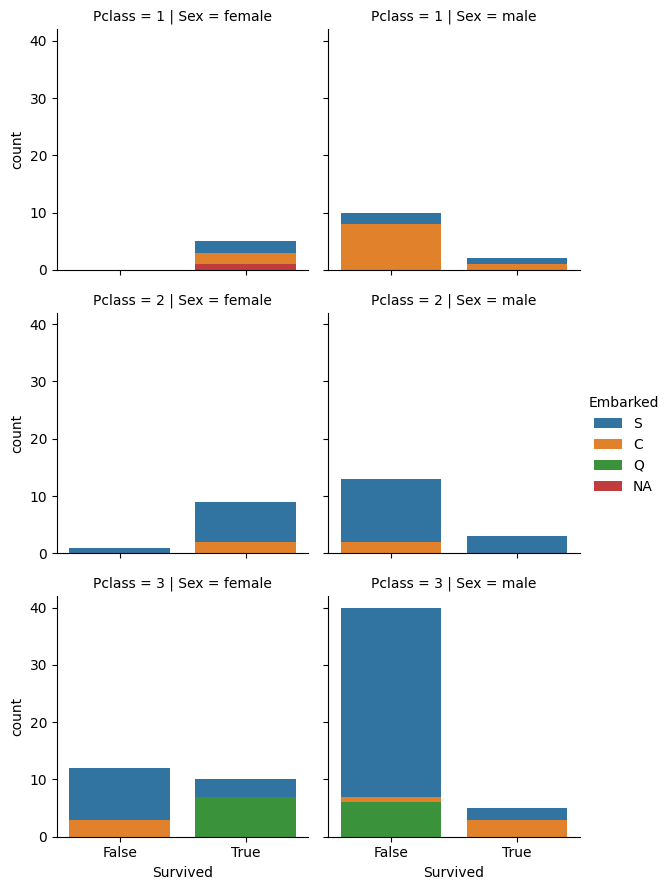

In [2]:
import seaborn as sns
g = sns.FacetGrid(data,
                  col="Sex",
                  row="Pclass",
                  hue="Embarked",
                  col_order=["female","male"]) #hue_order=["C","Q","S","NA"] は表示が崩れた
g.map(sns.countplot,
      "Survived",
      order=[False, True]) #order を指定しないと警告が出る
g.add_legend()

## plotnine

- Embarked が string だとうまく行かなかったが、 `Categorical` か `Enum` ならOK
- `Enum` にしておけば、その並び順でプロットされる

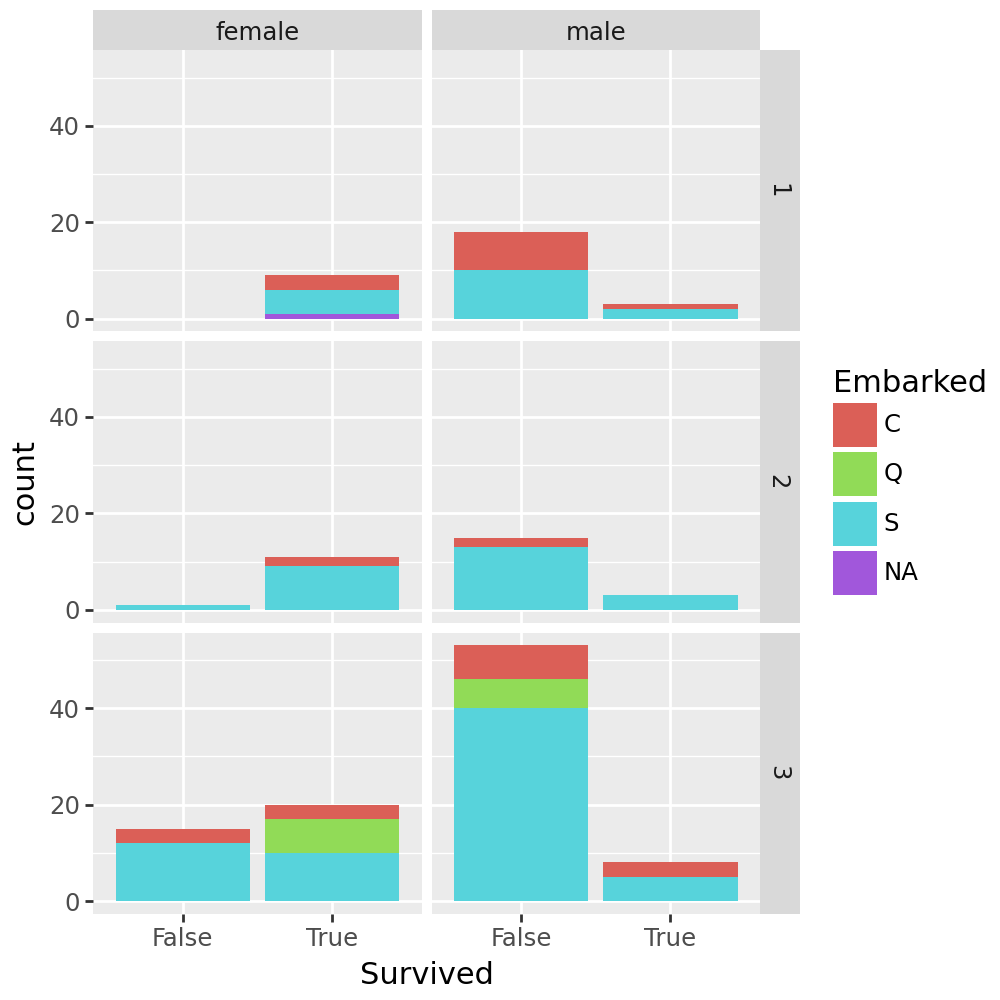

In [3]:
from plotnine import *
from plotnine.data import *

# カテゴリカルの並び順を決めてしまえばプロットもそれに従う
enum = pl.Enum(["C","Q","S","NA"])
data2 = data.clone()
data2 = data2.with_columns(pl.col("Embarked").cast(enum))

g  = ggplot(data2, aes(x='Survived', fill="Embarked"))
g += geom_bar()
g += facet_grid("Pclass ~ Sex")
g += theme(figure_size=(5, 5))
g

# data3

## Plotly Express

* 並び順を指定しないと、Pclass も 3>1>2 みたいな並び順になる（多い順？）
  * 並び順の指定を dict 一か所でまとめられるのは便利 
* 積み上げグラフ内の順番は変更できないようだ
* Facet も histogram 内で指定するのが特徴的

https://plotly.com/python/facet-plots/

In [4]:
import plotly.express as px

fig = px.histogram(data,
                   x="Survived",
                   histfunc="count",
                   color="Embarked",
                   barmode="stack",
                   facet_row="Pclass",
                   facet_col="Sex",
                   width=500,
                   height=500,
                   category_orders={"Sex": ["female", "male"],
                                    "Pclass": [1,2,3],
                                    "Survived":[False, True],
                                    "Embarked":["C","Q","S","NA"]})
fig.show()

## Altair

* 文字列の中に `count(Survived)` などと式を指定する必要があるのがあまり好きではない
* オプションの指定は長いが構造的で覚えやすそう。でも長い。
  * 並び順を指定しなくてよければ `alt.Color` などは　`color=""` などとシンプルに書ける 

* [altair pandas value counts horizontal bar chart](https://stackoverflow.com/questions/62405935/altair-pandas-value-counts-horizontal-bar-chart)
* [multiple column/row facet wrap in altair](https://stackoverflow.com/questions/50164001/multiple-column-row-facet-wrap-in-altair)
* [Arrange facets in a grid](https://github.com/altair-viz/altair/issues/681)
* [Custom order in facet](https://github.com/altair-viz/altair/issues/1703)
  * Row/Colではうまくいかなかった。Colorには効いた。
* [altair.Row](https://altair-viz.github.io/user_guide/generated/channels/altair.Row.html)
  * "ascending"/"descending" は効いた

In [5]:
import altair as alt

alt.Chart(data).mark_bar().encode(
    alt.Y('count(Survived):Q'),
    alt.X('Survived:N'),
    alt.Color("Embarked:N", sort=["C","Q","S","NA"]),
).properties(
    width=150,
    height=150
).facet(
    row=alt.Row("Pclass:N", sort="ascending"),
    column=alt.Column("Sex:N", sort="ascending")
)

alt.FacetChart(...)

* [【Python】グラフ作成ライブラリ Altair の使い方(2021年の記事)](https://qiita.com/keisuke-ota/items/80d64153c499c8cc4774)
* [【Python】データ可視化ライブラリ Altair を使いこなす（2021年の記事）](https://qiita.com/keisuke-ota/items/aa93f45b3a9fc520541d)